In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

## 單層問題(One Layer Problem)

### 環境變量(parameters)

We want to simulate a 1D problem with a dielectric layer with thickness d = 0.5 $\mu$m. Find the transmission and reflcetion coefficients for the waves with $\lambda>0.25$ $\mu$m and $\lambda<10$ $\mu$m.

In [32]:
resolution = 500
dpml = 3
sz = 5

cell_size = mp.Vector3(z=sz+2*dpml)
pml_layers = [mp.PML(thickness=dpml)]
dimensions = 1

In [33]:
frq_min = 0.1
frq_max = 5
nfreq = 500
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min

### 介質分佈(Geometry and Material)

In [34]:
d = 0.5
index = 3.5
geometry = [mp.Block(mp.Vector3(mp.inf,mp.inf,d),
                     center=mp.Vector3(),
                     material=mp.Medium(index=3.5))]

### 波源（Sources)

In [35]:
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ex,
                     center=mp.Vector3(z=-0.5),
                     size=mp.Vector3())]

### 模擬與通量監控（Simulations and Fluxes)

In [36]:
br = 0.01
sim_vac = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=dimensions,
                    sources=sources)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=-d/2-br))
tran = sim_vac.add_flux(fcen, df, nfreq, tran_fr)

In [37]:
pt = mp.Vector3(z=-d/2-br)

sim_vac.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))
vac_flux = mp.get_fluxes(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00342393 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 11 with resolution 500
time for set_epsilon = 0.00357509 s
-----------
field decay(t = 50.001): 0.25007484434638566 / 0.25007484434638566 = 1.0
field decay(t = 100.002): 6.955806247109381e-14 / 0.25007484434638566 = 2.7814897837043934e-13
run 0 finished at t = 100.002 (100002 timesteps)


In [38]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=dimensions,
                    sources=sources,
                    geometry=geometry)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=d/2+br))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

In [39]:
pt = mp.Vector3(z=d/2+br)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))
tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000888824 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 11 with resolution 500
     block, center = (0,0,0)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)
time for set_epsilon = 0.00125313 s
-----------
field decay(t = 50.001): 0.11975461214538047 / 0.11975461214538047 = 1.0
field decay(t = 100.002): 7.110149396215339e-16 / 0.11975461214538047 = 5.937265604086893e-15
run 0 finished at t = 100.002 (100002 timesteps)


### 結果分析與繪圖（Analysis and Graphs)

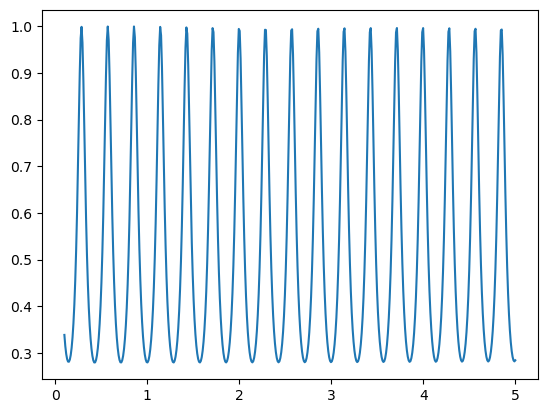

In [40]:
tran_flux = np.array(tran_flux)
vac_flux = np.array(vac_flux)
plt.plot(flux_freqs,tran_flux/vac_flux)

## 多層問題(Multi-Layer Problem)

### 環境變量(parameters)

We want to simulate a 1D problem with multi dielectric layers with an index array = [3,1,3,1,3,1,3] and a thickness array = [1.55/12,1.55/4,1.55/12,1.55/4,1.55/12,1.55/4,1.55/12] $\mu$m. Find the transmission and reflcetion coefficients for the waves with $\lambda>0.25$ $\mu$m and $\lambda<10$ $\mu$m.

In [2]:
resolution = 500
dpml = 3
sz = 5

cell_size = mp.Vector3(z=sz+2*dpml)
pml_layers = [mp.PML(thickness=dpml)]
dimensions = 1

In [3]:
frq_min = 0.1
frq_max = 5
nfreq = 500
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min

### 介質分佈(Geometry and Material)

In [4]:
d = 1.55/12*4 + 1.55/4*3
index = 3
vac_pl = [-1.55/4 - 1.55/12, 0, 1.55/4 + 1.55/12]

geometry = [mp.Block(mp.Vector3(mp.inf,mp.inf,d),
                     center=mp.Vector3(),
                     material=mp.Medium(index=index))]
for vac_p in vac_pl:
    geometry.append(mp.Block(mp.Vector3(mp.inf,mp.inf,1.55/4),
                     center=mp.Vector3(z=vac_p),
                     material=mp.Medium(index=1)))

In [5]:
geometry = [mp.Block(mp.Vector3(mp.inf,mp.inf,1.55/12),
                     center=mp.Vector3(z=-1.55/4/2-1.55/12-1.55/4-1.55/12/2),
                     material=mp.Medium(index=index)),
            mp.Block(mp.Vector3(mp.inf,mp.inf,1.55/12),
                     center=mp.Vector3(z=-1.55/4/2-1.55/12/2),
                     material=mp.Medium(index=index)),
            mp.Block(mp.Vector3(mp.inf,mp.inf,1.55/12),
                     center=mp.Vector3(z=1.55/4/2+1.55/12/2),
                     material=mp.Medium(index=index)),
            mp.Block(mp.Vector3(mp.inf,mp.inf,1.55/12),
                     center=mp.Vector3(z=1.55/4/2+1.55/12+1.55/4+1.55/12/2),
                     material=mp.Medium(index=index))]

### 波源（Sources)

In [5]:
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ex,
                     center=mp.Vector3(z=-d/2-1),
                     size=mp.Vector3(mp.inf,mp.inf,0))]

### 模擬與通量監控（Simulations and Fluxes)

In [6]:
br = 0.01
sim_vac = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=dimensions,
                    sources=sources)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=-d/2-br))
tran = sim_vac.add_flux(fcen, df, nfreq, tran_fr)

In [7]:
pt = mp.Vector3(z=-d/2-br)

sim_vac.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-5))
vac_flux = mp.get_fluxes(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 0.0033741 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 11 with resolution 500
time for set_epsilon = 0.0036869 s
-----------
field decay(t = 50.001): 0.24996672862652822 / 0.24996672862652822 = 1.0
field decay(t = 100.002): 8.441070519573668e-15 / 0.24996672862652822 = 3.376877621255488e-14
run 0 finished at t = 100.002 (100002 timesteps)


In [8]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=dimensions,
                    sources=sources,
                    geometry=geometry)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=d/2+br))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

In [9]:
pt = mp.Vector3(z=d/2+br)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-5))
tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000887156 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 11 with resolution 500
     block, center = (0,0,0)
          size (1e+20,1e+20,1.67917)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (9,9,9)
     block, center = (0,0,-0.516667)
          size (1e+20,1e+20,0.3875)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.3875)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.516667)
          size (1e+20,1e+20,0.3875)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00247908 s
-----------
field decay(t = 50.001): 0.07679741151043158 / 0.07679741151043158 = 1.0
field decay(t = 100.002): 2.0118333588955917e-07

### 結果分析與繪圖（Analysis and Graphs)

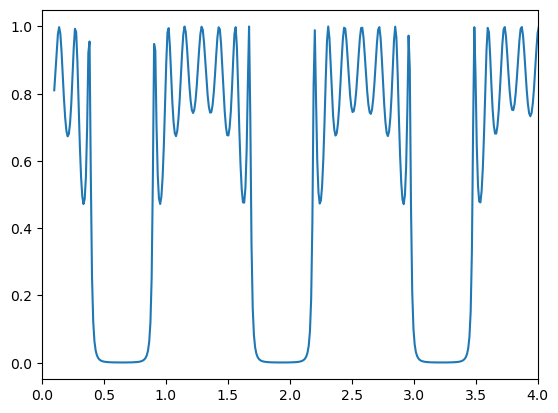

In [10]:
tran_flux = np.array(tran_flux)
vac_flux = np.array(vac_flux)
plt.xlim(0,4)
plt.plot(flux_freqs,tran_flux/vac_flux)

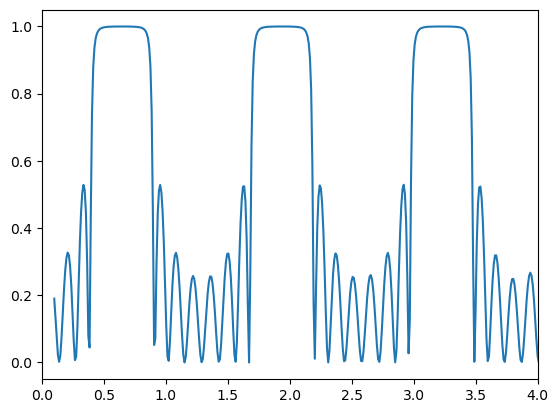

In [31]:
plt.xlim(0,4)
plt.plot(flux_freqs,1-tran_flux/vac_flux)

In [12]:
sim.reset_meep()
sim.run(until=20)
ex_data = sim.get_array(component=mp.Ex,center=mp.Vector3(),size=mp.Vector3(z=sz))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000893116 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 11 with resolution 500
     block, center = (0,0,0)
          size (1e+20,1e+20,1.67917)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (9,9,9)
     block, center = (0,0,-0.516667)
          size (1e+20,1e+20,0.3875)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.3875)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.516667)
          size (1e+20,1e+20,0.3875)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00533891 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20.0)

run 1 finished at t = 20.0 (20000 timesteps)


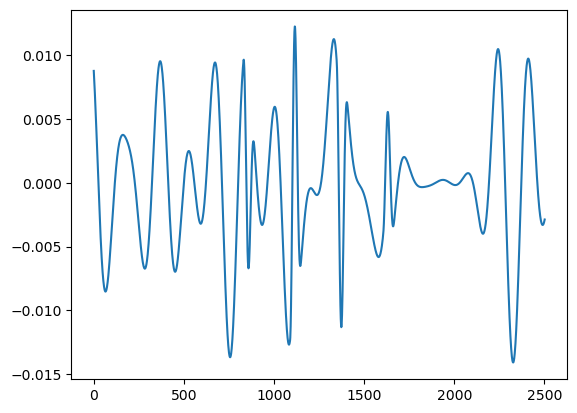

In [13]:
plt.plot(ex_data)

In [154]:
(5+3+3)*500

5500

In [22]:
sim.reset_meep()
ex_data = []
def rec_Ex(sim):
    ex_data.append(sim.get_array(component=mp.Ex,center=mp.Vector3(),size=mp.Vector3(z=sz)))
sim.run(mp.at_every(0.5,rec_Ex), until=100)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000902891 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 11 with resolution 500
     block, center = (0,0,0)
          size (1e+20,1e+20,1.67917)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (9,9,9)
     block, center = (0,0,-0.516667)
          size (1e+20,1e+20,0.3875)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.3875)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.516667)
          size (1e+20,1e+20,0.3875)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00539589 s
-----------


FloatProgress(value=0.0, description='0% done ')

run 3 finished at t = 100.0 (100000 timesteps)


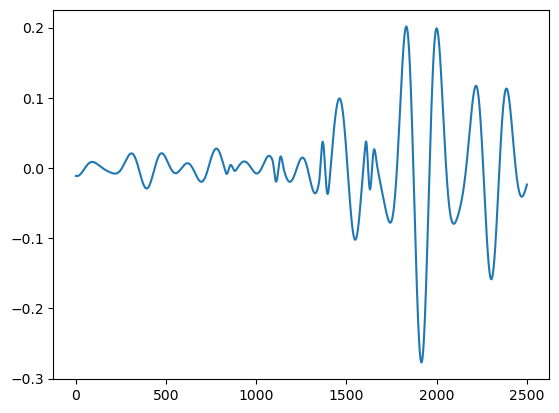

In [20]:
plt.plot(ex_data[5])

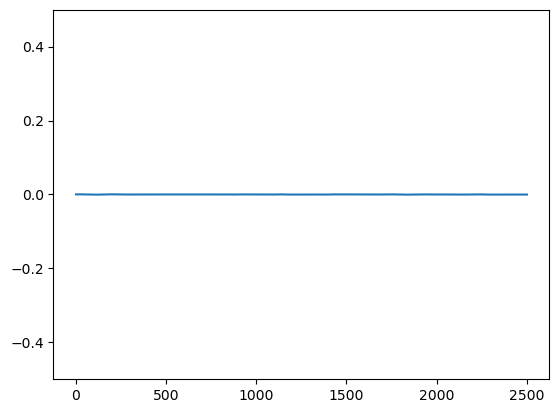

In [30]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

plt.ylim(-0.5,0.5)
line, = ax.plot(ex_data[0])

def animate(i):
    line.set_ydata(ex_data[i])  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=100)

ani.save("ex_fields.mp4")

plt.show()


### 作業(Homework)

Hw1: 以自己的邏輯編寫一個副程式(subprogram)。此副程式可以輸入一維多層模的介質分佈狀況，然後輸出此多層模在任意頻率或k值的穿透係數(transmission coefficient)與反射係數(reflection coefficient)。之後試著用自己的副程式計算在這個workshop有出現的例子並比較。

Hw2: 以Meep模擬一維多層膜結構然後測量通量並去計算穿透率與反射率。多層膜結構由兩種膜組成A及B，A膜的permittiviy $\epsilon_A=12$，厚度是2 $\mu$m; B膜的permittivity $\epsilon_B=3$，厚度是3 $\mu$m。此多層膜包含10層A膜及10層B膜且其結構為: ABABABABABBABABABABA。畫出穿透率在$1/\lambda$=0.025~0.07之間的變化圖形。

Hw3: 試著改變這個workshop例子的參數，然後觀察對結果的影響，包括膜的厚度，介電常數，多層膜的層數等等。